In [29]:
import os
import numpy as np
from IPython.display import HTML

from HMM import unsupervised_HMM
from HMM_helper import (
    text_to_wordcloud,
    states_to_wordclouds,
    parse_observations,
    sample_sentence,
    visualize_sparsities,
    animate_emission
)

## Visualization of the dataset

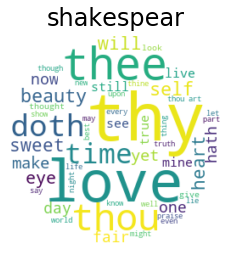

In [30]:
text = open(os.path.join(os.getcwd(), 'data/shakespeare.txt')).read()
wordcloud = text_to_wordcloud(text, title='shakespear')

In [4]:
syl = open(os.path.join(os.getcwd(), 'data/Syllable_dictionary.txt')).read()

In [5]:
with open('data/Syllable_dictionary.txt') as f:
  syl = dict(x.rstrip().split(None, 1) for x in f)

In [6]:
for key, val in syl.items():
    syl[key] = val.split( )[-1]
    

In [7]:
syl

{"'gainst": '1',
 "'greeing": '2',
 "'scaped": '1',
 "'tis": '1',
 "'twixt": '1',
 'a': '1',
 'a-doting': '3',
 'abhor': '2',
 'abide': '2',
 'able': '2',
 'about': '2',
 'above': '2',
 'absence': '2',
 'absent': '2',
 'abundance': '3',
 'abundant': '3',
 'abuse': '2',
 'abused': '2',
 'abuses': '3',
 'abysm': '2',
 'accents': '2',
 'acceptable': '4',
 'acceptance': '3',
 'accessary': '4',
 'accident': '3',
 'accidents': '3',
 'account': '2',
 'accumulate': '4',
 'accuse': '2',
 'accusing': '3',
 'achieve': '2',
 'acknowledge': '3',
 'acquaintance': '3',
 'acquainted': '3',
 'act': '1',
 'action': '2',
 'active': '2',
 'actor': '2',
 'add': '1',
 'added': '2',
 "adder's": '2',
 'addeth': '2',
 'adding': '2',
 'addition': '3',
 'adieu': '2',
 'adjunct': '2',
 'admire': '2',
 'admired': '3',
 'admiring': '3',
 'admit': '2',
 'admitted': '3',
 'adonis': '3',
 'adore': '2',
 'adulterate': '3',
 'advance': '2',
 'advantage': '3',
 'adverse': '2',
 'advised': '2',
 'advocate': '3',
 'afar': 

In [26]:
def split_by_sonnet_shakespeare(text): 
    """
    Split Shakespeare text by sonnet. 
    """
    return shakespeare_text.split("\n\n\n")

def split_by_sonnet_spenser(text): 
    """
    Split Spenser text by sonnet. 
    """
    sonnets = text.split("\n\n")
    # Remove sonnet number
    return [sonnets[i] for i in range(len(sonnets)) if i % 2 == 1]

def clean_shakespeare(text): 
    sonnets = split_by_sonnet_shakespeare(text)
    all_lines = []
    for i in range(0, len(sonnets)): 
        lines = sonnets[i].split("\n")
        for j in range(1, len(lines)):
            all_lines.append(lines[j])
    return '\n'.join(all_lines)

def clean_spenser(text): 
    sonnets = split_by_sonnet_spenser(text)
    return '\n'.join(sonnets)

In [32]:
# Import text
shakespeare_text = open(os.path.join(os.getcwd(),  'data/shakespeare.txt')).read()

#spenser_text = open(os.path.join(os.getcwd(), 'data/spenser.txt')).read()

In [33]:
shakespeare_sonnets = split_by_sonnet_shakespeare(shakespeare_text)
shakespeare_clean = clean_shakespeare(shakespeare_text)
full_text = shakespeare_clean
obs, obs_map = parse_observations(full_text)


In [91]:
def generate_emission1(self, M, seed):
        '''
        Generates an emission of length M, assuming that the starting state
        is chosen uniformly at random. 

        Arguments:
            M:          Length of the emission to generate.

        Returns:
            emission:   The randomly generated emission as a list.

            states:     The randomly generated states as a list.
        '''
        
        #O: The (i, j)^th element is the probability of
        # emitting observation j given state i.
        O = np.array(self.O)
        emission = []
        emission.append(seed)
       
        # generate first state given this emission 
        col_states = O[:, seed]
       
        # Choose the state having the highest probability of generating
        # this emission. 
        
        state = np.argmax(col_states)       
        states = []
        for t in range(M-1):
            # Append state.
            states.append(state)

            # Sample next observation.
            rand_var = random.uniform(0, 1)
            next_obs = 0

            while rand_var > 0:
                rand_var -= self.O[state][next_obs]
                next_obs += 1

            next_obs -= 1
            emission.insert(0, next_obs)

            # Sample next state.
            rand_var = random.uniform(0, 1)
            next_state = 0

            while rand_var > 0:
                rand_var -= self.A[state][next_state]
                next_state += 1

            next_state -= 1
            state = next_state

        return emission, states
    
def obs_map_reverser1(obs_map):
    obs_map_r = {}

    for key in obs_map:
        obs_map_r[obs_map[key]] = key

    return obs_map_r

def sample_sentence1(hmm, obs_map, seed, n_words=100, n_syllables = 10):
    # Get reverse map.
    seed_idx = obs_map[seed]
    obs_map_r = obs_map_reverser1(obs_map)

    # obs_map is of the form key=word: val=identifier
    # Pass the identifier 

    
    # Sample and convert sentence.
    #emission, states = generate_emission1(hmm, n_words, seed_idx)
    #sentence = [obs_map_r[i] for i in emission]
    
    while True: 
        count = 0
        sentence = []
        emission, states = generate_emission1(hmm, n_words, seed_idx)
        emission.reverse()
        for i in emission: 
            word = obs_map_r[i]
            syllables_count = int(syl[word])
            count += syllables_count
            sentence.append(word)
            if count >= n_syllables: 
                break
        if count == n_syllables: 
            break
    sentence.reverse()

    return ' '.join(sentence).capitalize()

def parse_observations_reverse(text):
    # Convert text to dataset.
    lines = [line.split() for line in text.split('\n') if line.split()]

    obs_counter = 0
    obs = []
    obs_map = {}

    for line in reversed(lines):
        obs_elem = []
        
        for word in reversed(line):
            word = re.sub(r'[^\w\-\']', '', word).lower() 
            #word = re.sub(r'[^\w]', '', word).lower()
            if word not in obs_map:
                # Add unique words to the observations map.
                obs_map[word] = obs_counter
                obs_counter += 1
            
            # Add the encoded word.
            obs_elem.append(obs_map[word])
        
        # Add the encoded sequence.
        obs.append(obs_elem)

    return obs, obs_map

In [36]:
def build_rhyme_pairs_shakespeare(sonnets): 
    """
    Build a dictionary of rhyme pairs and their frequency of 
    occurrence in Shakespeare's sonnets. 
    """
    rhyme_pairs = dict()
    
    for i in range(0, len(sonnets)): 
        sonnet_num = i + 1
        # Excluce Sonnet 99, Sonnet 126, and Sonnet 145. 
        # Sonnet 99 has 15 lines, Sonnet 126 has 12 lines.
        # All other sonnets follow the same rhyme scheme.
        if sonnet_num == 99 or sonnet_num == 126: 
            
            # Sonnet 99 has 15 lines of rhyme scheme ababa cdcd efef gg. 
            # We will throw out the rhyme triple a. 
            if sonnet_num == 99: 
                lines = sonnets[i].split("\n")
                end_words = [' ']
                
                for j in range(1, 16): 
                    words = lines[j].split(' ')
                    last_word = words[-1].strip()
                    last_word = re.sub(r'[^\w\-\']', '', last_word).lower()
                    end_words.append(last_word)
                
                # Create pairs of rhyming words. 
                rhyme1 = (end_words[2], end_words[4])
                rhyme2 = (end_words[6], end_words[8])
                rhyme3 = (end_words[7], end_words[9])
                rhyme4 = (end_words[10], end_words[12])
                rhyme5 = (end_words[11], end_words[13])
                rhyme6 = (end_words[14], end_words[15])
                
                rhymes = [rhyme1, rhyme2, rhyme3, rhyme4, rhyme5, rhyme6]
                
                # Add rhyming pairs to dictionary and keep in track of their 
                # frequency of occurrence. 
                for pair in rhymes: 
                    if pair in rhyme_pairs: 
                        rhyme_pairs[pair] += 1
                    else: 
                        rhyme_pairs[pair] = 1
            
            # Sonnet 126 has 12 lines of rhyme scheme aa bb cc dd ee ff. 
            if sonnet_num == 126: 
                lines = sonnets[i].split("\n")
                end_words = [' ']
                for j in range(1, 13): 
                    words = lines[j].split(' ')
                    last_word = words[-1].strip()
                    last_word = re.sub(r'[^\w\-\']', '', last_word).lower()
                    end_words.append(last_word)
                # Create pairs of rhyming words. 
                rhyme1 = (end_words[1], end_words[2])
                rhyme2 = (end_words[3], end_words[4])
                rhyme3 = (end_words[5], end_words[6])
                rhyme4 = (end_words[7], end_words[8])
                rhyme5 = (end_words[9], end_words[10])
                rhyme6 = (end_words[11], end_words[12])
                
                rhymes = [rhyme1, rhyme2, rhyme3, rhyme4, rhyme5, rhyme6]
                
                # Add rhyming pairs to dictionary and keep in track of their 
                # frequency of occurrence. 
                for pair in rhymes: 
                    if pair in rhyme_pairs: 
                        rhyme_pairs[pair] += 1
                    else: 
                        rhyme_pairs[pair] = 1
                    
        else: 
            # Append the last word of each line (remove punctuation)
            lines = sonnets[i].split("\n")
            end_words = [' ']
            for j in range(1, 15): 
                words = lines[j].split(' ')
                last_word = words[-1].strip()
                last_word = re.sub(r'[^\w\-\']', '', last_word).lower()
                end_words.append(last_word)
            
            # Create pairs of rhyming words. Shakespeare's sonnets has the 
            # following rhyming structure per line: abab, cdcd, efef, gg. 
            rhyme1 = (end_words[1], end_words[3])
            rhyme2 = (end_words[2], end_words[4])
            rhyme3 = (end_words[5], end_words[7])
            rhyme4 = (end_words[6], end_words[8])
            rhyme5 = (end_words[9], end_words[11])
            rhyme6 = (end_words[10], end_words[12])
            rhyme7 = (end_words[13], end_words[14])
            
            rhymes = [rhyme1, rhyme2, rhyme3, rhyme4, rhyme5, rhyme6, rhyme7]
            
            # Add rhyming pairs to dictionary and keep in track of their 
            # frequency of occurrence. 
            for pair in rhymes: 
                if pair in rhyme_pairs: 
                    rhyme_pairs[pair] += 1
                else: 
                    rhyme_pairs[pair] = 1
                    
    return rhyme_pairs


In [37]:
def write_poem_shakespeare_rhyme(hmm, obs_map, rhyme_pairs, n_words): 
    """
    Generate a poem following the rhyme scheme of a typical Shakespeare
    Sonnet (abab cdcd efef gg)
    """
    poem = ''
    (a1, a2) = rhyme_pairs[0]
    (b1, b2) = rhyme_pairs[1]
    (c1, c2) = rhyme_pairs[2]
    (d1, d2) = rhyme_pairs[3]
    (e1, e2) = rhyme_pairs[4]
    (f1, f2) = rhyme_pairs[5]
    (g1, g2) = rhyme_pairs[6]
    
    poem += sample_sentence1(hmm, obs_map, a1, n_words=10) + '\n'
    poem += sample_sentence1(hmm, obs_map, b1, n_words=10) + '\n'
    poem += sample_sentence1(hmm, obs_map, a2, n_words=10) + '\n'
    poem += sample_sentence1(hmm, obs_map, b2, n_words=10) + '\n'
    poem += sample_sentence1(hmm, obs_map, c1, n_words=10) + '\n'
    poem += sample_sentence1(hmm, obs_map, d1, n_words=10) + '\n'
    poem += sample_sentence1(hmm, obs_map, c2, n_words=10) + '\n'
    poem += sample_sentence1(hmm, obs_map, d2, n_words=10) + '\n'
    poem += sample_sentence1(hmm, obs_map, e1, n_words=10) + '\n'
    poem += sample_sentence1(hmm, obs_map, f1, n_words=10) + '\n'
    poem += sample_sentence1(hmm, obs_map, e2, n_words=10) + '\n'
    poem += sample_sentence1(hmm, obs_map, f2, n_words=10) + '\n'
    poem += sample_sentence1(hmm, obs_map, g1, n_words=10) + '\n'
    poem += sample_sentence1(hmm, obs_map, g2, n_words=10)
    
    return poem

In [39]:
import re
import sys
import random
shakespeare_rhyme_pairs = build_rhyme_pairs_shakespeare(shakespeare_sonnets)

## Rhyme + 10 syllables

In [40]:
obs_reversed_shakespeare, obs_map_reversed_shakespeare = parse_observations_reverse(shakespeare_clean)
hmm3 = unsupervised_HMM(obs_reversed_shakespeare, 16, 100)

Iteration: 10
Iteration: 20
Iteration: 30
Iteration: 40
Iteration: 50
Iteration: 60
Iteration: 70
Iteration: 80
Iteration: 90
Iteration: 100


In [55]:
shakespeare_rhyme = random.sample(list(shakespeare_rhyme_pairs.keys()), 7)
print(write_poem_shakespeare_rhyme(hmm3, obs_map_reversed_shakespeare, shakespeare_rhyme, 8))

She will passed hath it thy set the more love
When muse belongs before to delight looks
Thou she make and my disgrace cold approve
Great that thou is for new two and blame hooks
From seals lest his heart minutes time repair
His tattered beauty's thee th' self eloquence
From stand before that thou in whereto fair
Me mine me among old told recompense
Lends your my former seeting stronger play'st
Will i that cars the self thy of brave end
To fairest even thy me abide sway'st
Not such a or for awards expire fiend
And that are thou well power thou the thee mind
Applying just for say to judgment find


In [59]:
hmm10 = unsupervised_HMM(obs_reversed_shakespeare, 10, 100)


Iteration: 10
Iteration: 20
Iteration: 30
Iteration: 40
Iteration: 50
Iteration: 60
Iteration: 70
Iteration: 80
Iteration: 90
Iteration: 100


In [68]:
shakespeare_rhyme = random.sample(list(shakespeare_rhyme_pairs.keys()), 7)
print(write_poem_shakespeare_rhyme(hmm10, obs_map_reversed_shakespeare, shakespeare_rhyme, 10))

Me like for that all of that and live i
Ground eyes shall with thy worst whose beated woe
And anew give my earth out crowned be
Since alone to thy thou dost to side know
So false but although i so of thy so
World enough doth is precious liberty
Would and true as plead that to thee make grow
But may therefore from heaven injury
When your told drown for touches their sins stage
Who ages where than not it the shame groan
Face profaned i thy beggared gave yet rage
Singleness make abundant days alone
Which that any was know with be me state
I not thou addition the time days hate


## Limerick (aabba, syllables: 996699)

In [89]:
rhyme_group = []
for i in range(30):
    
    one, two = list(shakespeare_rhyme_pairs.keys())[i]
    triple = [one, two]
    for pair in list(shakespeare_rhyme_pairs.keys())[i+1:]:
        p1, p2 = pair
        if p1 == one or p1 == two and p2 not in triple:
            triple.append(p2)
        if p2 == one or p2 == two and p1 not in triple:
            triple.append(p1)
    rhyme_group.append(triple)
        

In [90]:
rhyme_group

[['increase', 'decease', 'cease', 'lease', 'decrease'],
 ['die',
  'memory',
  'eye',
  'thereby',
  'sky',
  'masonry',
  'fortify',
  'eternity',
  'lie',
  'lie',
  'dignity'],
 ['eyes',
  'lies',
  'lies',
  'cries',
  'arise',
  'devise',
  'prophecies',
  'spies',
  'subtleties',
  'despise',
  'despise'],
 ['fuel', 'cruel', 'jewel'],
 ['ornament', 'content', 'spent'],
 ['spring', 'niggarding', 'king', 'thing', 'sing'],
 ['be',
  'thee',
  'see',
  'thee',
  'usury',
  'posterity',
  'me',
  'me',
  'melancholy',
  'see',
  'me',
  'decree',
  'idolatry',
  'free',
  'see',
  'i'],
 ['brow', 'now', 'allow', 'mow', 'now', 'bow', 'how', 'bough'],
 ['field', 'held', 'stelled'],
 ['lies',
  'eyes',
  'cries',
  'arise',
  'devise',
  'prophecies',
  'spies',
  'subtleties',
  'despise'],
 ['days', 'praise', 'praise', 'decays', 'lays'],
 ['use', "excuse'", 'abuse', 'muse', 'abuse'],
 ['mine', 'thine', 'shine', 'define', 'line', 'divine', 'thine'],
 ['old', 'cold', 'uphold', 'behold', 

In [92]:
def write_limerick(hmm, obs_map, rhyme_pairs, n_words): 
    """
    Generate a poem following the rhyme scheme of a typical Shakespeare
    Sonnet (abab cdcd efef gg)
    """
    poem = ''
    a1, a2, a3 = rhyme_pairs[0]
    b1, b2 = rhyme_pairs[1]
    
    poem += sample_sentence1(hmm, obs_map, a1, n_words=10, n_syllables = 9) + '\n'
    poem += sample_sentence1(hmm, obs_map, a2, n_words=10, n_syllables = 9) + '\n'
    poem += sample_sentence1(hmm, obs_map, b1, n_words=10, n_syllables = 6) + '\n'
    poem += sample_sentence1(hmm, obs_map, b2, n_words=10, n_syllables = 6) + '\n'
    poem += sample_sentence1(hmm, obs_map, a3, n_words=10, n_syllables = 9) 

    
    return poem

In [110]:
limerick_rhyme = random.sample(rhyme_group, 2)
limerick_rhyme[0] = limerick_rhyme[0][:3]
limerick_rhyme[1] = limerick_rhyme[1][:2]
print(write_limerick(hmm3, obs_map_reversed_shakespeare, limerick_rhyme, 8))

Dumb be say hath compound grace th' abuse
All false dead to thee from of part use
Lines cover increase dwell
Shame stage deceive excel
Not should gave a thyself that air muse


In [106]:
limerick_rhyme = random.sample(rhyme_group, 2)
limerick_rhyme[0] = limerick_rhyme[0][:3]
limerick_rhyme[1] = limerick_rhyme[1][:2]
print(write_limerick(hmm3, obs_map_reversed_shakespeare, limerick_rhyme, 8))

The when weakens beauteous your ink frame
Is thee to own life every time same
Saved deserts lies alone
Your bed me commits gone
Not thee by in thou born the time name


## Part I: Visualizing the wordcloud of each state

Below, we visualize each state as a wordcloud by sampling a large emission from the state:

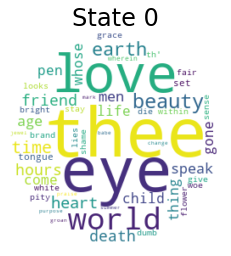

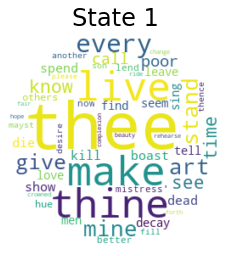

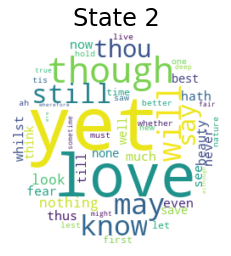

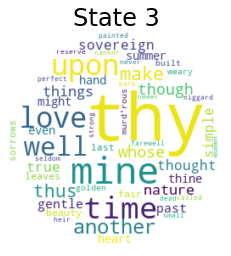

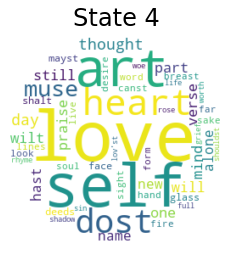

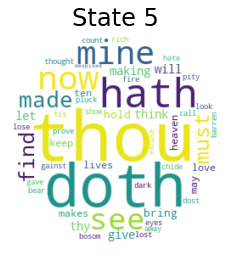

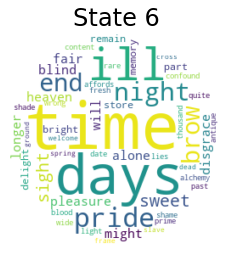

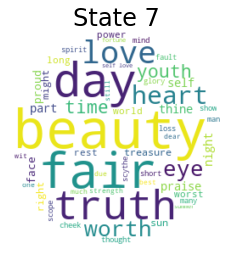

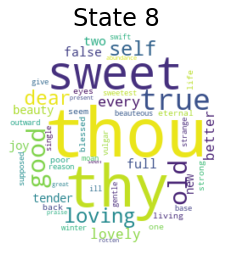

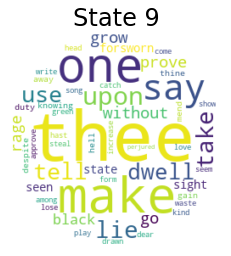

In [114]:
wordclouds = states_to_wordclouds(hmm10, obs_map_reversed_shakespeare)

In [179]:
def find_top_15(hmm, state_idx, obs_map):
    # O: Observation matrix with dimensions L x D.
    # The (i, j)^th element is the probability of
    # emitting observation j given state i.
    
    obs_map_r = obs_map_reverser(obs_map)
    
    O = np.array(hmm.O)
    state_i = O[state_idx]
    #top_10 = (state_i[np.argsort(state_i)[-10:]]) 
    top_10_idx = state_i.argsort()[-:][::-1]
    emissions = []
    for i in top_10_idx:
        emissions.append(obs_map_r[i])
        
    return emissions 

def obs_map_reverser(obs_map):
    obs_map_r = {}

    for key in obs_map:
        obs_map_r[obs_map[key]] = key

    return obs_map_r

In [180]:
all_frequent_words = []
for i in range(10):
    print("state: " + str(i) + " \n" + str(find_top_15(hmm10, i, obs_map_reversed_shakespeare)))
    all_frequent_words.extend(find_top_15(hmm10, i, obs_map_reversed_shakespeare))

state: 0 
['me', 'thee', 'that', 'love', 'eyes', 'his', 'you', 'eye', 'world', 'be', 'beauty', 'o', 'have', 'him', 'earth']
state: 1 
['my', 'thee', 'be', 'make', 'thine', 'every', 'live', 'you', 'art', 'mine', 'give', 'this', 'show', 'stand', 'see']
state: 2 
['i', 'and', 'that', 'but', 'when', 'not', 'which', 'it', 'then', 'is', 'if', 'you', 'so', 'as', 'for']
state: 3 
['the', 'thy', 'of', 'a', 'his', 'in', 'and', 'that', 'your', 'so', 'for', 'by', 'this', 'no', 'all']
state: 4 
['love', 'self', 'art', 'heart', 'dost', 'muse', 'still', 'verse', 'wilt', 'being', 'thoughts', 'will', 'hast', 'one', 'alone']
state: 5 
['to', 'in', 'of', 'and', 'with', 'thou', 'doth', 'from', 'on', 'is', 'not', 'a', 'be', 'for', 'are']
state: 6 
['time', 'days', 'more', 'those', 'night', 'end', 'pride', 'sight', 'same', 'lies', 'wide', 'delight', 'dead', 'fair', 'will']
state: 7 
['all', 'beauty', 'truth', 'by', 'day', 'love', 'fair', 'worth', 'eye', 'time', 'heart', 'youth', 'this', 'night', 'thine']
st

## Parts of speech and states

In [138]:
import nltk
nltk.download('averaged_perceptron_tagger')
nltk.download('universal_tagset')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/katerina/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package universal_tagset to
[nltk_data]     /Users/katerina/nltk_data...
[nltk_data]   Unzipping taggers/universal_tagset.zip.


True

In [181]:
len(all_frequent_words)

150

In [182]:

from nltk import pos_tag
tagged = pos_tag(all_frequent_words ,tagset='universal')

tag_fd = nltk.FreqDist(tag for (word, tag) in tagged)
tag_fd.most_common()

[('NOUN', 36),
 ('VERB', 31),
 ('ADJ', 20),
 ('ADP', 18),
 ('DET', 16),
 ('PRON', 15),
 ('ADV', 7),
 ('CONJ', 4),
 ('NUM', 2),
 ('PRT', 1)]

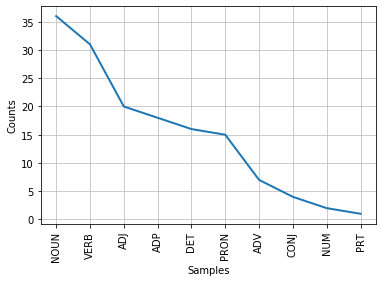

In [183]:
tag_fd.plot(cumulative=False)

In [185]:
for i in range (10):
    tagged0 = pos_tag(find_top_15(hmm10, i, obs_map_reversed_shakespeare), tagset='universal')

    tag_fd = nltk.FreqDist(tag for (word, tag) in tagged0)
    print(tag_fd.most_common())

[('VERB', 5), ('NOUN', 5), ('PRON', 4), ('ADP', 1)]
[('VERB', 7), ('NOUN', 3), ('PRON', 2), ('DET', 2), ('ADJ', 1)]
[('ADV', 3), ('ADP', 3), ('CONJ', 2), ('DET', 2), ('PRON', 2), ('VERB', 2), ('NOUN', 1)]
[('DET', 5), ('ADP', 5), ('PRON', 2), ('NOUN', 1), ('CONJ', 1), ('ADV', 1)]
[('VERB', 5), ('NOUN', 5), ('ADJ', 2), ('PRON', 1), ('ADV', 1), ('NUM', 1)]
[('ADP', 6), ('VERB', 3), ('PRT', 1), ('CONJ', 1), ('ADJ', 1), ('NOUN', 1), ('ADV', 1), ('DET', 1)]
[('NOUN', 7), ('ADJ', 4), ('VERB', 2), ('ADV', 1), ('DET', 1)]
[('NOUN', 9), ('DET', 2), ('ADJ', 2), ('ADP', 1), ('VERB', 1)]
[('ADJ', 5), ('PRON', 3), ('NOUN', 3), ('VERB', 2), ('DET', 2)]
[('VERB', 4), ('NOUN', 3), ('ADJ', 3), ('ADP', 2), ('PRON', 1), ('DET', 1), ('NUM', 1)]
